Phishing Detection Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

recall-> all the positive cases.-> true positive/true positive+false negative
precision-> true positive/true positive+false positive
f1 score->considers both false positives and false negatives
Support ->refers to the number of actual occurrences of the 2 classes in the dataset.


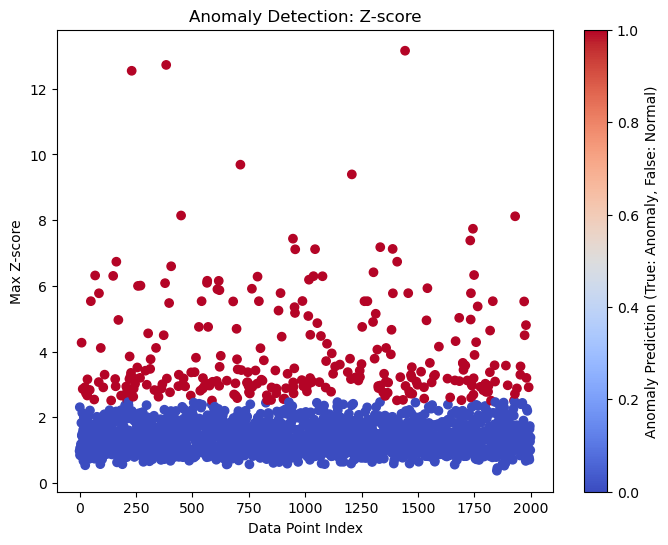

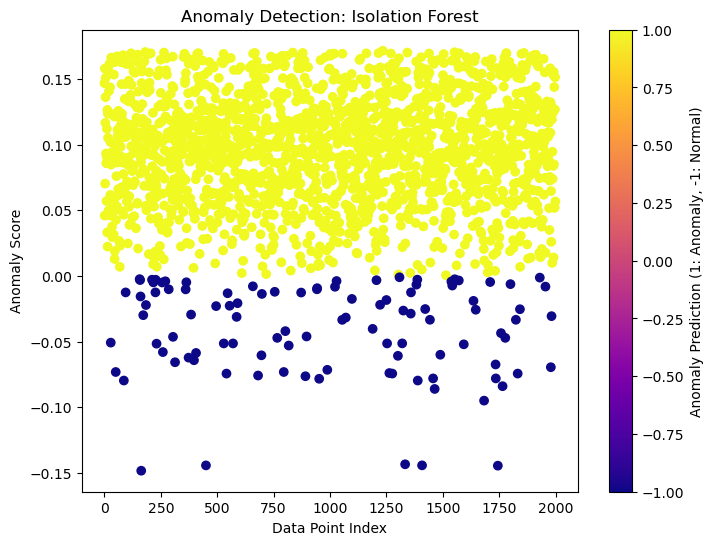

Decision Tree: Accuracy on training Data: 0.965
Decision Tree: Accuracy on test Data: 0.964


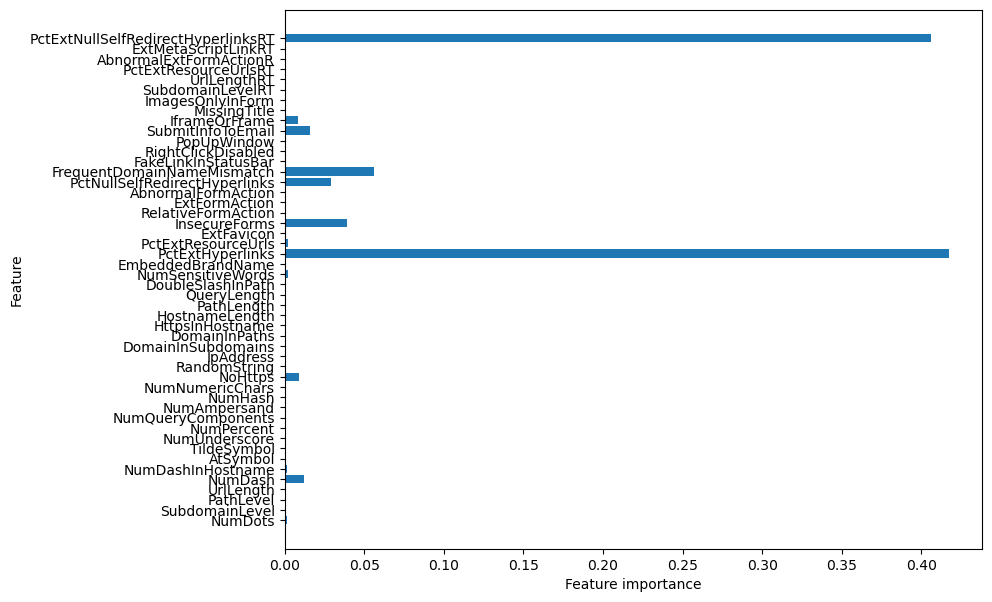

Text(value='', description='Enter Link:')

Button(description='Check Link', style=ButtonStyle())

Label(value='')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
data = pd.read_csv('phishing_dataset.csv')

# Extract features
X = data[['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']]
y = data['CLASS_LABEL']  # Target variable (1 for phishing, 0 for legitimate)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#100 is the number of trees, 42 is the seed of randomness
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions for phishing detection
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance for phishing detection
print(f"Phishing Detection Accuracy: {accuracy_score(y_test, y_pred):.2f}")# ratio between the value of test and the value of prediction
print(classification_report(y_test, y_pred))
print('''recall-> all the positive cases.-> true positive/true positive+false negative
precision-> true positive/true positive+false positive
f1 score->considers both false positives and false negatives
Support ->refers to the number of actual occurrences of the 2 classes in the dataset.''')

# Dimensionality reduction using PCA
pca = PCA(n_components=10)  # Adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate Z-scores for anomaly detection
z_scores = np.abs((X_test_pca - X_train_pca.mean(axis=0)) / X_train_pca.std(axis=0))

# Set a threshold for anomaly detection (e.g., z_score_threshold = 2.5)
z_score_threshold = 2.5
anomaly_mask = np.any(z_scores > z_score_threshold, axis=1)

# Visualize anomaly scores 
plt.figure(figsize=(8, 6))
plt.scatter(range(len(anomaly_mask)), z_scores.max(axis=1), c=anomaly_mask, cmap='coolwarm')
plt.xlabel("Data Point Index")
plt.ylabel("Max Z-score")
plt.title("Anomaly Detection: Z-score")
plt.colorbar(label="Anomaly Prediction (True: Anomaly, False: Normal)")
plt.show()

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train_scaled)

# Predict anomalies (1 for anomalies, -1 for normal instances)
anomaly_predictions = iso_forest.predict(X_test_scaled)

# Visualize anomaly scores
anomaly_scores = iso_forest.decision_function(X_test_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=anomaly_predictions, cmap='plasma')
plt.xlabel("Data Point Index")
plt.ylabel("Anomaly Score")
plt.title("Anomaly Detection: Isolation Forest")
plt.colorbar(label="Anomaly Prediction (1: Anomaly, -1: Normal)")
plt.show()

# Decision Tree model 

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show() 


# Create a function to check the link
def check_phishing_link(link):
  
# Extract features (using your existing feature names)
 def extract_link_features(link):
  link_features = []
  # Feature extraction logic (using your existing feature names)
  link_features.append(link.count('.'))  # NumDots
  subdomain_level = len(link.split('.')[:-1]) - 1  # Exclude top-level domain
  link_features.append(subdomain_level)  # SubdomainLevel
  path_level = len(link.split('/')[:-1]) - 1  # Exclude root pat
  link_features.append(path_level)  # PathLevel
  link_features.append(len(link))  # UrlLength
  link_features.append(link.count('-'))  # NumDash
  num_dash_in_hostname = link.split("//")[0].count('-') if len(link.split("//")) > 1 else 0
  link_features.append(num_dash_in_hostname)  # NumDashInHostname
  link_features.append(link.count('@'))  # AtSymbol
  link_features.append(link.count('~'))  # TildeSymbol
  link_features.append(link.count('_'))  # NumUnderscore
  link_features.append(link.count('%'))  # NumPercent
  return [link_features]
  # ... (add more features as needed, using your existing feature names)

 link_features = extract_link_features(link)
    # Standardize the features
 link_scaled = scaler.transform([link_features])
    # Predict using the trained model
 prediction = rf_classifier.predict(link_scaled)
 if prediction[0] == 1:
        return "This link is likely a phishing link."
 else:
        return "This link appears to be legitimate."

# Create an input widget for the link
link_input = widgets.Text(description="Enter Link:")

# Create a button widget to check the link
check_button = widgets.Button(description="Check Link")
output_label = widgets.Label()

# Define the callback function for the button
def on_button_click(b):
    link = link_input.value
    result = check_phishing_link(link)
    output_label.value = result

# Attach the callback function to the button
check_button.on_click(on_button_click)

# Display the widgets
display(link_input, check_button, output_label)